<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# загружаем данные
houses = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_01/houses.csv")

In [7]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


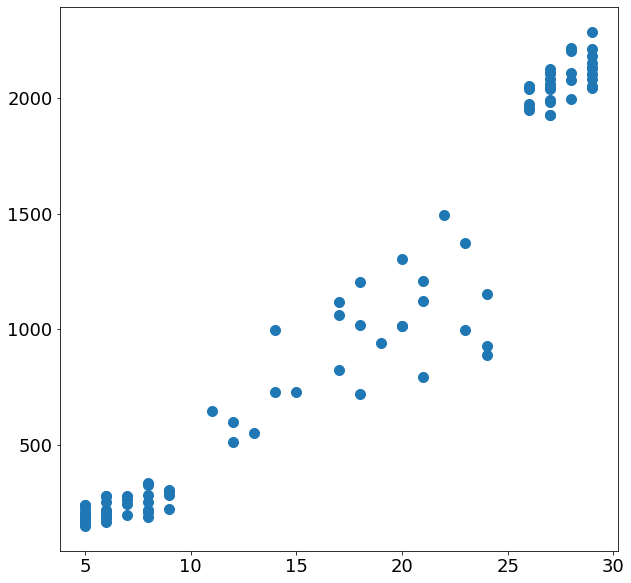

In [8]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)

# отображаем картинку
plt.show()

price = a * dim1 + b

In [9]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [10]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1"]]
y = houses["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [11]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1):
    return a + b * dim_1

In [12]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [13]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

2057.887633711507

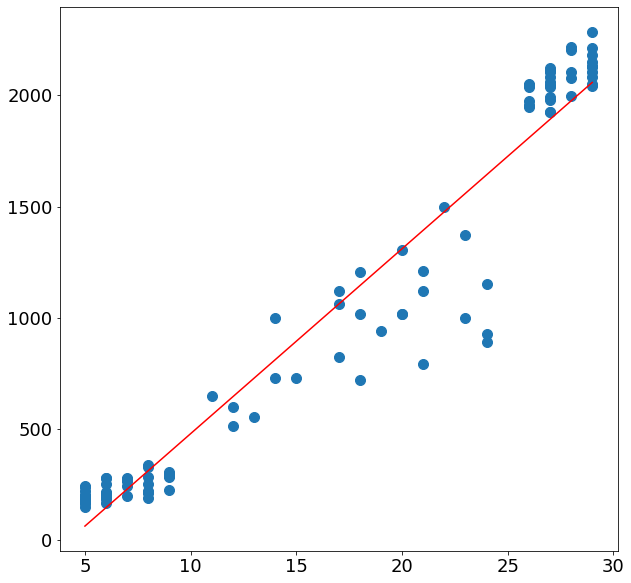

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)
# помещаем предсказания
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="red")

# отображаем картинку
plt.show()

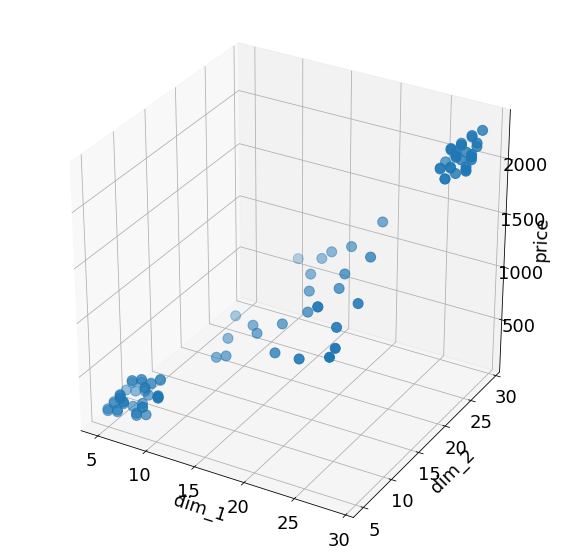

In [15]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

In [16]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1", "dim_2"]]
y = houses["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [ ]:
# price = price(dim_1, dim_2) = a + b1 * dim_1 + b2 * dim_2

In [17]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [18]:
reg_prediction(X.dim_1[0], X.dim_2[0])

2080.82359179565

In [19]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

2080.82359179565

In [20]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

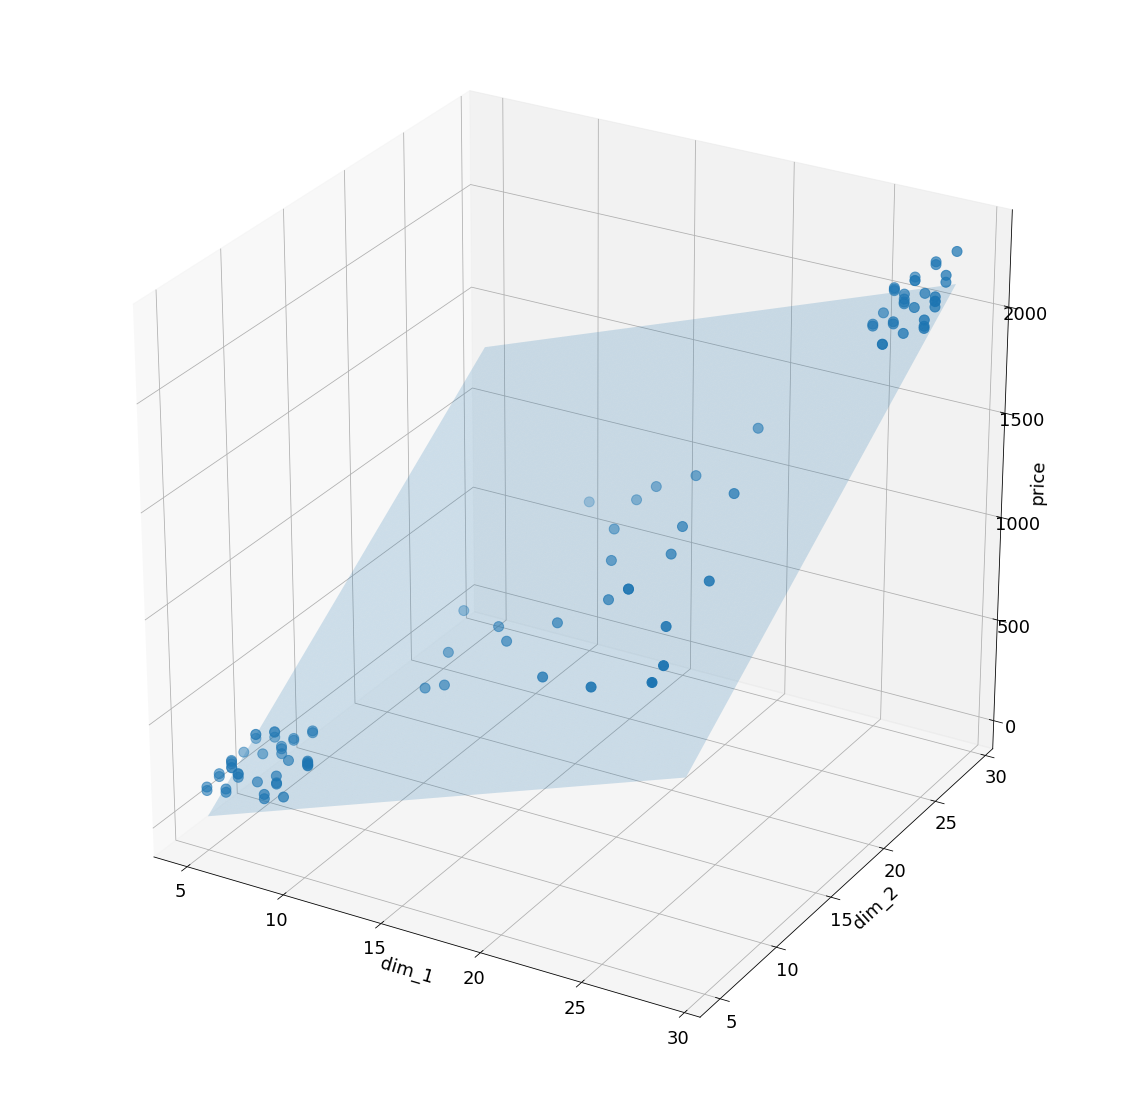

In [21]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()